# Tensorflow Basic
以下程式來自
https://tf.wiki/zh_hant/basic/basic.html

In [ ]:
import tensorflow as tf
tf.__version__

'2.8.0'

本手冊基於TensorFlow的即時執行模式（Eager Execution）。在TensorFlow 1.X版本中，必須在導入TensorFlow套件後呼叫tf.enable_eager_execution()函數以啟用即時執行模式。在TensorFlow 2中，即時執行模式將成為預設模式，無需額外呼叫tf.enable_eager_execution()函數（不過若要關閉即時執行模式，則需呼叫tf.compat.v1.disable_eager_execution()函數）。

## Tensorflow <-> Numpy
1. constant
2. variable
3. operation

TensorFlow使用**張量**（Tensor）作為資料的基本單位。TensorFlow的張量在概念上等同於多維陣列，我們可以使用它來描述數學中的純量（0維陣列）、向量（1維陣列）、矩陣（2維陣列）等各種量，範例如下：

In [ ]:
# 定義一個隨機數（純量）
random_float = tf.random.uniform(shape=())
print('tensor 隨機數: ', random_float)
# 定義一個有2個元素的零向量
zero_vector = tf.zeros(shape=(2))
print('tensor 兩個元素的零向量: ', zero_vector)
# 定義兩個2×2的常量矩陣
A = tf.constant([[1., 2.], [3., 4.]])
B = tf.constant([[5., 6.], [7., 8.]])
print('tensor 2*2 矩陣: ', A)

tensor 隨機數:  tf.Tensor(0.8112519, shape=(), dtype=float32)
tensor 兩個元素的零向量:  tf.Tensor([0. 0.], shape=(2,), dtype=float32)
tensor 2*2 矩陣:  tf.Tensor(
[[1. 2.]
 [3. 4.]], shape=(2, 2), dtype=float32)


In [ ]:
# 查看矩陣A的形狀、類型和值
print('A: ', A)
print('A.shape: ', A.shape)      # 輸出(2, 2)，即矩陣的長和寬均為2
print('A.dtype: ', A.dtype)      # 輸出<dtype: 'float32'>
print('A.numpy: ', A.numpy())     # 輸出[[1. 2.]
                    #    [3. 4.]]

A:  tf.Tensor(
[[1. 2.]
 [3. 4.]], shape=(2, 2), dtype=float32)
A.shape:  (2, 2)
A.dtype:  <dtype: 'float32'>
A.numpy:  [[1. 2.]
 [3. 4.]]


TensorFlow的大多數API函數會根據輸入的值自動推斷張量中元素的類型（一般預設為tf.float32）。

不過你也可以通過加入dtype參數來自行指定類型，例如將使得張量中的元素類型均為整數。

`zero_vector = tf.zeros(shape=(2), dtype=tf.int32)`


TensorFlow 裡有大量的運算函數（Operation），使得我們可以將已有的張量進行運算後得到新的張量

In [ ]:
C = tf.add(A, B)   # 計算矩陣A和B的和
D = tf.matmul(A, B) # 計算矩陣A和B的乘積
print('add A, B: ', C)
print('matmul A, B: ', D)

add A, B:  tf.Tensor(
[[ 6.  8.]
 [10. 12.]], shape=(2, 2), dtype=float32)
matmul A, B:  tf.Tensor(
[[19. 22.]
 [43. 50.]], shape=(2, 2), dtype=float32)


可見，我們成功使用tf.add()操作計算出$\begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix} + \begin{bmatrix} 5 & 6 \\ 7 & 8 \end{bmatrix} = \begin{bmatrix} 6 & 8 \\ 10 & 12 \end{bmatrix}$，\
使用tf.matmul()操作計算出$\begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix} \times \begin{bmatrix} 5 & 6 \\ 7 & 8 \end{bmatrix} = \begin{bmatrix} 19 & 22 \\43 & 50 \end{bmatrix}。$

## 自動推導機制 (Auto differentiate)
在機器學習中，我們經常需要計算函數的導數。TensorFlow提供了強大的自動推導機制來計算導數。

在即時執行模式下，TensorFlow引入了`tf.GradientTape`() 這個**“推導記錄器”**來實現自動微分。

以下程式碼展示瞭如何使用`tf.GradientTape()`計算函數 $y(x) = x^2$ 在 $x = 3$ 時的導數：

In [ ]:
x = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:     # 在 tf.GradientTape() 的上下文內，所有計算步驟都會被記錄以用於推導
    y = tf.square(x)
y_grad = tape.gradient(y, x)        # 計算y關於x的導數
print('y = ', y)
print('y_grad = ', y_grad)

y =  tf.Tensor(9.0, shape=(), dtype=float32)
y_grad =  tf.Tensor(6.0, shape=(), dtype=float32)


這裡 $x$ 是一個初始化為3的變數（Variable），使用`tf.Variable()`宣告。與普通張量一樣，

變數同樣具有形狀、類型和值三種屬性。使用變數需要有一個初始化過程，

可以通過在`tf.Variable()`中指定`initial_value`參數來指定初始值。這裡將變數x初始化為3. 

變數與普通張量的一個重要區別是其預設能夠被TensorFlow的自動推導機制所求，因此往往被用於定義機器學習模型的參數。

tf.GradientTape()是一個自動推導的記錄器。只要進入了的上下文環境，則在該環境中計算步驟都會被自動記錄。比如在上面的範例中，計算步驟即被自動記錄。離開上下文環境後，記錄將停止，但記錄器依然可用，因此可以通過求張量對變數的導數

In [ ]:
X = tf.constant([[1., 2.], [3., 4.]])
y = tf.constant([[1.], [2.]])
w = tf.Variable(initial_value=[[1.], [2.]])
b = tf.Variable(initial_value=1.)
with tf.GradientTape() as tape:
    L = tf.reduce_sum(tf.square(tf.matmul(X, w) + b - y))
w_grad, b_grad = tape.gradient(L, [w, b])        # 計算L(w, b)關於w, b的偏導數
print('Loss: ', L)
print('w_grad: ', w_grad)
print('b_grad: ', b_grad)

Loss:  tf.Tensor(125.0, shape=(), dtype=float32)
w_grad:  tf.Tensor(
[[ 70.]
 [100.]], shape=(2, 1), dtype=float32)
b_grad:  tf.Tensor(30.0, shape=(), dtype=float32)


`tf.square()` 操作代表對輸入張量的每一個元素求平方

`tf.reduce_sum()` 操作代表對輸入張量的所有元素求和，輸出一個形狀為空的純量張量（可以通過axis參數來指定求和的維度，不指定則預設對所有元素求和）。

TensorFlow中有大量的張量操作API，包括數學運算、張量形狀操作（如tf.reshape()）、切片和連接（如tf.concat()）等多種類型，

從輸出可見，TensorFlow 幫助我們計算出了

![](https://i.imgur.com/g3bpbNo.png)

![](https://i.imgur.com/TSZcKY1.png)

In [ ]:
import numpy as np

X_raw = np.array([2013, 2014, 2015, 2016, 2017], dtype=np.float32)
y_raw = np.array([12000, 14000, 15000, 16500, 17500], dtype=np.float32)

X = (X_raw - X_raw.min()) / (X_raw.max() - X_raw.min())
y = (y_raw - y_raw.min()) / (y_raw.max() - y_raw.min())

![](https://i.imgur.com/TsU8g1O.png)

![](https://i.imgur.com/EoKqFvI.png)

In [ ]:
X = tf.constant(X)
y = tf.constant(y)

a = tf.Variable(initial_value=0.)
b = tf.Variable(initial_value=0.)
variables = [a, b]

num_epoch = 10000
optimizer = tf.keras.optimizers.SGD(learning_rate=5e-4)
for e in range(num_epoch):
    # 使用tf.GradientTape()記錄損失函數的梯度資訊
    with tf.GradientTape() as tape:
        y_pred = a * X + b
        loss = tf.reduce_sum(tf.square(y_pred - y))
    # TensorFlow自動計算損失函數關於自變數（模型參數）的梯度
    grads = tape.gradient(loss, variables)
    # TensorFlow自動根據梯度更新參數
    optimizer.apply_gradients(grads_and_vars=zip(grads, variables))

print('a: ', a)
print('b: ', b)


a:  <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.97637>
b:  <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.057565063>


![](https://i.imgur.com/BouT9UF.png)

![](https://i.imgur.com/9APTh4c.png)
![](https://i.imgur.com/ij4OL4o.png)

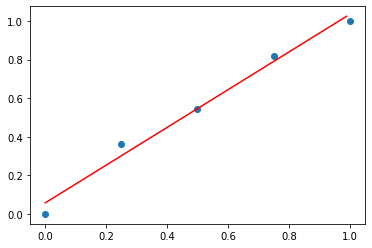

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X, y)

line_x = np.arange(0, 1, 0.01)
line_y = a * line_x + b
plt.plot(line_x, line_y, 'r-')